<a href="https://colab.research.google.com/github/MorganGautherot/Machine_Learning_Courses/blob/master/Random_Forest_%26_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest & boosting

## 1 Decision Tree

Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks. They are very powerful algorithms, capable of fitting complex datasets.

### How it works

        To understand Decision Trees, let’s just build one and take a look at how it makes predictions.

In [22]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = load_iris()
X = iris.data[:, ]
y = iris.target

decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

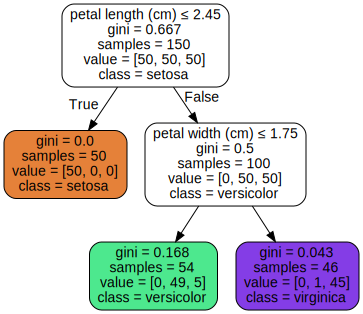

In [23]:
import graphviz 
dot_data = tree.export_graphviz(decision_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

Let’s see how the tree represented in the figure above makes predictions. Suppose you find an iris flower and you want to classify it. You start at the root node (depth 0, at the top): this node asks whether the flower’s petal length is smaller than 2.45 cm. If it is, then you move down to the root’s left child node (depth 1, left). In this case, it is a leaf node (i.e., it does not have any children nodes), so it does not ask any questions: you can simply look at the predicted class for that node and the Decision Tree predicts that your flower is an Iris-Setosa (class=setosa).

Now suppose you find another flower, but this time the petal length is greater than 2.45 cm. You must move down to the root’s right child node (depth 1, right), which is not a leaf node, so it asks another question: is the petal width smaller than 1.75 cm? If it is, then your flower is most likely an Iris-Versicolor (depth 2, left). If not, it is likely an Iris-Virginica (depth 2, right). It’s really that simple.

### Decision boundary

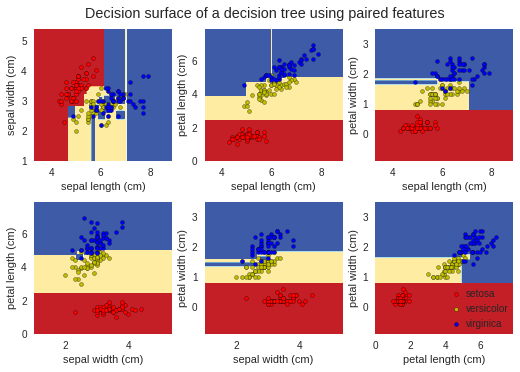

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## 2 Random Forest

Now you better understand what is decision tree you will works with model which can generate several tree and use them to be more accurate on prediction and classification.

### Preliminaries

In [0]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Load pandas
import pandas as pd

# Load numpy
import numpy as np

# Set random seed
np.random.seed(0)

### Load data

In [28]:
# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

### Your code start here ###

# Use .iloc to select only X data
X = 

# Use pd.factorize the target value into 0, 1, 2 classes.
y = 

# split train test using skleanr test_size = 0.33
X_train, X_test, y_train, y_test = 

### Your code end here ###

In [34]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(X_train))
print('Number of observations in the test data:',len(X_test))

Number of observations in the training data: 100
Number of observations in the test data: 50


### Train model

In [42]:
### Your code start here ###

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(X_train, y_train)

### Your code end here ###

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Prediction on train and test set

In [0]:
### Your code start here ###

# Use the forest's predict method on the test data
y_predict_train = 
y_predict_test =

### Your code end here ###

### Compute accuracy for Training and Testing prediction

In [50]:
### Your code start here ###
accuracy_train = 
accuracy_test = 
### Your code end here ###

print(accuracy_train)
print(accuracy_test)

1.0
0.98


### 3 Gradient boosted tree

### Gradient boosting in practice

Most of the challenges in applying GBRT successfully in practice can be illustrated in the context of a simple curve fitting example. Below you can see a regression problem with one feature x and the corresponding response y. 

We draw 100 training data points by picking an x coordinate uniformly at random, evaluating the ground truth (sinoid function; light blue line) and then adding some random gaussian noise. In addition to the 100 training points (blue) we also draw 100 test data points (red) which we will use the evaluate our approximation.

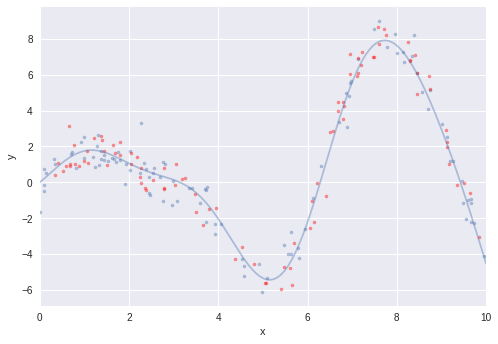

In [63]:
import numpy as np

def ground_truth(x):
  """Ground truth -- function to approximate"""
  return x * np.sin(x) + np.sin(2 * x)

def gen_data(n_samples=200):
  """generate training and testing data"""
  np.random.seed(13)
  x = np.random.uniform(0, 10, size=n_samples)
  x.sort()
  y = ground_truth(x) + 0.75 * np.random.normal(size=n_samples)
  train_mask = np.random.randint(0, 2, size=n_samples).astype(np.bool)
  x_train, y_train = x[train_mask, np.newaxis], y[train_mask]
  x_test, y_test = x[~train_mask, np.newaxis], y[~train_mask]
  return x_train, x_test, y_train, y_test

X_train, X_test, y_train, y_test = gen_data(200)

# plot ground truth
x_plot = np.linspace(0, 10, 500)

def plot_data(figsize=(8, 5)):
  fig = plt.figure(figsize=figsize)
  gt = plt.plot(x_plot, ground_truth(x_plot), alpha=0.4, label='ground truth')

# plot training and testing data
plt.scatter(X_train, y_train, s=10, alpha=0.4)
plt.scatter(X_test, y_test, s=10, alpha=0.4, color='red')
plt.xlim((0, 10))
plt.ylabel('y')
plt.xlabel('x')
plt.plot(x_plot, ground_truth(x_plot), alpha=0.4, label='ground truth')

plt.show()

If you fit an individual regression tree to the above data you get a piece-wise constant approximation. The deeper you grow the tree, the more constant segments you can accommodate and thus, the more variance you can capture.

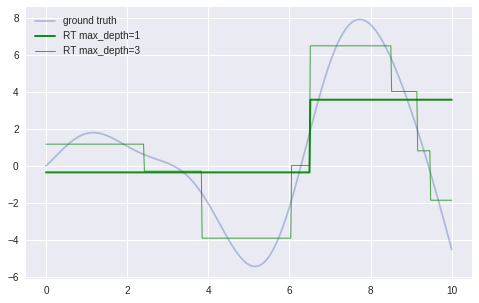

In [64]:
from sklearn.tree import DecisionTreeRegressor

plot_data()

est = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)

plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),

         label='RT max_depth=1', color='g', alpha=0.9, linewidth=2)
est = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
label='RT max_depth=3', color='g', alpha=0.7, linewidth=1)

plt.legend(loc='upper left')

Now, let's fit a gradient boosting model to the training data and let's see how the approximation progresses as we add more and more trees. The scikit-learn gradient boosting estimators allow you to evaluate the prediction of a model as a function of the number of trees via the staged_(predict|predict_proba) methods. These return a generator that iterates over the predictions as you add more and more trees.

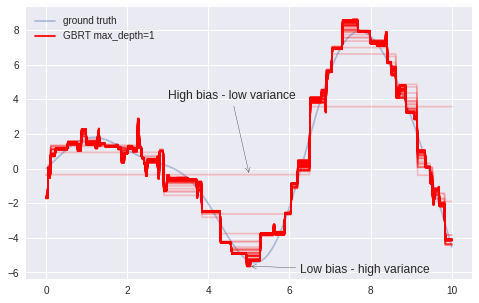

In [81]:
from itertools import islice
from  sklearn.ensemble import GradientBoostingRegressor

plot_data()

est = GradientBoostingRegressor(n_estimators=1000, max_depth=1, learning_rate=1.0)
est.fit(X_train, y_train)

ax = plt.gca()
first = True

# step over prediction as we added 20 more trees.
for pred in islice(est.staged_predict(x_plot[:, np.newaxis]), 0, 1000, 10):
  plt.plot(x_plot, pred, color='r', alpha=0.2)
  if first:
    ax.annotate('High bias - low variance', xy=(x_plot[x_plot.shape[0] // 2],
    pred[x_plot.shape[0] // 2]),
    xycoords='data',
    xytext=(3, 4), textcoords='data',
    arrowprops=dict(arrowstyle="->",
    connectionstyle="arc"))
    first = False

pred = est.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, pred, color='r', label='GBRT max_depth=1')
ax.annotate('Low bias - high variance', xy=(x_plot[x_plot.shape[0] // 2],
        pred[x_plot.shape[0] // 2]),
        xycoords='data', xytext=(6.25, -6),
        textcoords='data', arrowprops=dict(arrowstyle="->",
        connectionstyle="arc"))
plt.legend(loc='upper left')
plt.show()

The above plot shows 50 red lines where each shows the response of the GBRT model after 20 trees have been added. It starts with a very crude approximation that can only fit more-or-less constant functions (i.e. High bias - low variance) but as we add more trees the more variance our model can capture resulting in the solid red line.

We can see that the more trees we add to our GBRT model and the deeper the individual trees are the more variance we can capture thus the higher the complexity of our model. But as usual in machine learning model complexity comes at a price -- overfitting.

An important diagnostic when using GBRT in practice is the so-called deviance plot that shows the training/testing error (or deviance) as a function of the number of trees.

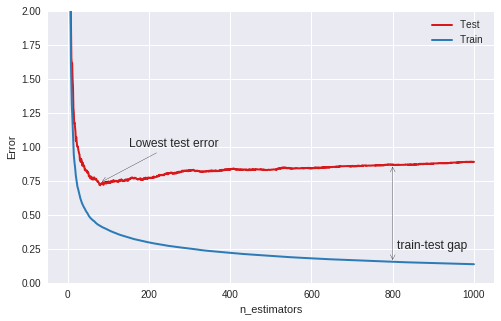

In [103]:
n_estimators = len(est.estimators_)
def deviance_plot(est, X_test, y_test, ax=None, label='', train_color='#2c7bb6',
  test_color='#d7191c', alpha=1.0):
  """Deviance plot for ``est``, use ``X_test`` and ``y_test`` for test error. """
  test_dev = np.empty(n_estimators)

  for i, pred in enumerate(est.staged_predict(X_test)):
    test_dev[i] = est.loss_(y_test, pred)

  if ax is None:
    fig = plt.figure(figsize=(8, 5))
    ax = plt.gca()

  ax.plot(np.arange(n_estimators) + 1, test_dev, color=test_color, label='Test %s' % label,
  linewidth=2, alpha=alpha)
  ax.plot(np.arange(n_estimators) + 1, est.train_score_, color=train_color,
  label='Train %s' % label, linewidth=2, alpha=alpha)
  ax.set_ylabel('Error')
  ax.set_xlabel('n_estimators')
  ax.set_ylim((0, 2))
  
  return test_dev, ax

test_dev, ax = deviance_plot(est, X_test, y_test)
ax.legend(loc='upper right')

# add some annotations
ax.annotate('Lowest test error', xy=(test_dev.argmin() + 1, test_dev.min() + 0.02), xycoords='data',
xytext=(150, 1.0), textcoords='data',
arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
)

ann = ax.annotate('', xy=(800, test_dev[799]), xycoords='data',
xytext=(800, est.train_score_[799]), textcoords='data',
arrowprops=dict(arrowstyle="<->"))
ax.text(810, 0.25, 'train-test gap')
plt.show()

The blue line above shows the training error: it rapidly decreases in the beginning and then gradually slows down but keeps decreasing as we add more and more trees. The testing error (red line) too decreases rapidly in the beginning but then slows down and reaches its minimum fairly early (~50 trees) and then even starts increasing. This is what we call overfitting, at a certain point the model has so much capacity that it starts fitting the idiosyncrasies of the training data -- in our case the random gaussian noise component that we added -- and hence limiting its ability to generalize to new unseen data. A large gap between training and testing error is usually a sign of overfitting.

The great thing about gradient boosting is that it provides a number of knobs to control overfitting. These are usually subsumed by the term regularization.

### Regularization of gradient boosting

GBRT provide three knobs to control overfitting: tree structure, shrinkage, and randomization.

The depth of the individual trees is one aspect of model complexity. The depth of the trees basically control the degree of feature interactions that your model can fit. For example, if you want to capture the interaction between a feature latitude and a feature longitude your trees need a depth of at least two to capture this. Unfortunately, the degree of feature interactions is not known in advance but it is usually fine to assume that it is fairly low -- in practice, a depth of 4-6 usually gives the best results. In scikit-learn you can constrain the depth of the trees using the max_depth argument.  

Another way to control the depth of the trees is by enforcing a lower bound on the number of samples in a leaf: this will avoid unbalanced splits where a leaf is formed for just one extreme data point. In scikit-learn you can do this using the argument min_samples_leaf. This is effectively a means to introduce bias into your model with the hope to also reduce variance as shown in the example below:

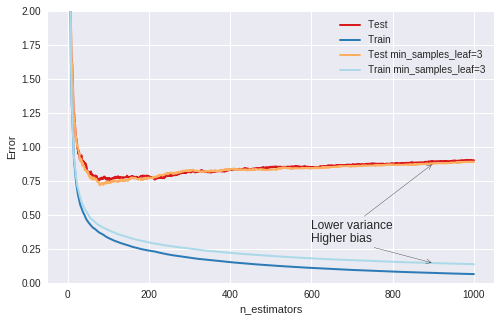

In [106]:


def fmt_params(params):
  return ", ".join("{0}={1}".format(key, val) for key, val in params.items())

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()

for params, (test_color, train_color) in [({}, ('#d7191c', '#2c7bb6')),
({'min_samples_leaf': 3},
('#fdae61', '#abd9e9'))]:
  est = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=1, learning_rate=1.0)
  est.set_params(**params)
  est.fit(X_train, y_train)

  test_dev, ax = deviance_plot(est, X_test, y_test, ax=ax, label=fmt_params(params),
  train_color=train_color, test_color=test_color)

ax.annotate('Higher bias', xy=(900, est.train_score_[899]), xycoords='data',
xytext=(600, 0.3), textcoords='data',
arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
)
ax.annotate('Lower variance', xy=(900, test_dev[899]), xycoords='data',
xytext=(600, 0.4), textcoords='data',
arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
)



plt.legend(loc='upper right')
plt.show()

### Shrinkage

The most important regularization technique for GBRT is shrinkage: the idea is basically to do slow learning by shrinking the predictions of each individual tree by some small scalar, the learning_rate. By doing so the model has to re-enforce concepts. A lower learning_rate requires a higher number of n_estimators to get to the same level of training error -- so its trading runtime against accuracy.

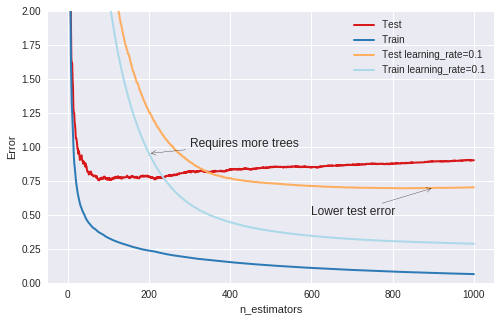

In [110]:
fig = plt.figure(figsize=(8, 5))

ax = plt.gca()

for params, (test_color, train_color) in [({}, ('#d7191c', '#2c7bb6')),

                                          ({'learning_rate': 0.1},

                                           ('#fdae61', '#abd9e9'))]:

    est = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=1, learning_rate=1.0)

    est.set_params(**params)

    est.fit(X_train, y_train)
    test_dev, ax = deviance_plot(est, X_test, y_test, ax=ax, label=fmt_params(params),
    train_color=train_color, test_color=test_color)

ax.annotate('Requires more trees', xy=(200, est.train_score_[199]), xycoords='data',
xytext=(300, 1.0), textcoords='data',
arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
)
ax.annotate('Lower test error', xy=(900, test_dev[899]), xycoords='data',
xytext=(600, 0.5), textcoords='data',
arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
)
plt.legend(loc='upper right')

plt.show()

### Stochastic Gradient boosting

Similar to RandomForest, introducing randomization into the tree building process can lead to higher accuracy. Scikit-learn provides two ways to introduce randomization: a) subsampling the training set before growing each tree (subsample) and b) subsampling the features before finding the best split node (max_features). Experience showed that the latter works better if there is a sufficient large number of features (>30). One thing worth noting is that both options reduce runtime.

Below we show the effect of using subsample=0.5, i.e. growing each tree on 50% of the training data, on our toy example:



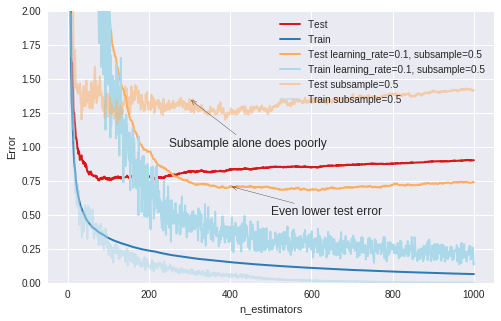

In [112]:
fig = plt.figure(figsize=(8, 5))

ax = plt.gca()

for params, (test_color, train_color) in [({}, ('#d7191c', '#2c7bb6')),

                                          ({'learning_rate': 0.1, 'subsample': 0.5},

                                           ('#fdae61', '#abd9e9'))]:

    est = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=1, learning_rate=1.0,

                                    random_state=1)

    est.set_params(**params)

    est.fit(X_train, y_train)

    test_dev, ax = deviance_plot(est, X_test, y_test, ax=ax, label=fmt_params(params),

                                 train_color=train_color, test_color=test_color)
ax.annotate('Even lower test error', xy=(400, test_dev[399]), xycoords='data',
xytext=(500, 0.5), textcoords='data',
arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
)

est = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=1, learning_rate=1.0,
subsample=0.5)
est.fit(X_train, y_train)
test_dev, ax = deviance_plot(est, X_test, y_test, ax=ax, label=fmt_params({'subsample': 0.5}),
train_color='#abd9e9', test_color='#fdae61', alpha=0.5)
ax.annotate('Subsample alone does poorly', xy=(300, test_dev[299]), xycoords='data',
xytext=(250, 1.0), textcoords='data',
arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
)
plt.legend(loc='upper right', fontsize='small')

plt.show()

### Hyperparameter tuning

We now have introduced a number of hyperparameters -- as usual in machine learning it is quite tedious to optimize them. Especially, since they interact with each other (learning_rate and n_estimators, learning_rate and subsample, max_depth and max_features). 

We usually follow this recipe to tune the hyperparameters for a gradient boosting model:

Choose loss based on your problem at hand (ie. target metric)
Pick n_estimators as large as (computationally) possible (e.g. 3000).
Tune max_depth, learning_rate, min_samples_leaf, and max_features via grid search.
Increase n_estimators even more and tune learning_rate again holding the other parameters fixed.
Scikit-learn provides a convenient API for hyperparameter tuning and grid search:

In [116]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
'max_depth': [4, 6],
'min_samples_leaf': [3, 5, 9, 17],
# 'max_features': [1.0, 0.3, 0.1] ## not possible in our example (only 1 fx)
}

est = GradientBoostingRegressor(n_estimators=3000)
# this may take some minutes
gs_cv = GridSearchCV(est, param_grid, n_jobs=4).fit(X_train, y_train)

# best hyperparameter setting
gs_cv.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.05, 'max_depth': 6, 'min_samples_leaf': 5}